In [66]:
import numpy as np
from IPython.display import HTML, display
import pandas as pd

In [67]:
seqA = 'GCATGCT'
seqB = 'GATACCA'


num_rows = len("-"+seqA)
num_cols = len("-"+seqB)

row_labels = [label for label in "-"+seqA]
column_labels = [label for label in "-"+seqB]

scoring_array = np.full([num_rows, num_cols], 0)
print("Scoring Array: \n", scoring_array)

traceback_array = np.full([num_rows, num_cols], '-')
print("Traceback Array: \n", traceback_array)

Scoring Array: 
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
Traceback Array: 
 [['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-']]


In [68]:
# Making arrays look pretty

def nice_table(data_array, row_labels, col_labels):
    df = pd.DataFrame(data_array, index=row_labels, columns=col_labels)
    table_html = df.to_html()
    return HTML(table_html)
display(nice_table(scoring_array, row_labels, column_labels))

,-,G,A,T,A,C,C,A
-,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0


In [69]:
# Iterate over array with nested loops = practice
count = 0
for i in range(num_rows):
    for j in range(num_cols):
        scoring_array[i, j] = count
        count += 1

display(nice_table(scoring_array, row_labels, column_labels))

,-,G,A,T,A,C,C,A
-,0,1,2,3,4,5,6,7
G,8,9,10,11,12,13,14,15
C,16,17,18,19,20,21,22,23
A,24,25,26,27,28,29,30,31
T,32,33,34,35,36,37,38,39
G,40,41,42,43,44,45,46,47
C,48,49,50,51,52,53,54,55
T,56,57,58,59,60,61,62,63


## Needleman-Wunsch Implementation
We're going to start by building our scoring and traceback arrays

In [72]:
num_rows = len(seqA) + 1
num_cols = len(seqB) + 1
row_labels = [label for label in "-"+seqA]
col_labels = [label for label in "-"+seqB]

scoring_array = np.full([num_rows, num_cols], 0)
traceback_array = np.full([num_rows, num_cols], "-")

# Using arrow emojis for traceback array
up_arrow = "⬆"
down_arrow = "⬇"
right_arrow = "➡"
left_arrow = "⬅"
right_down_arrow = "↘"
left_up_arrow = "↖"

arrow = "-"
gap_penalty = -2
match_bonus = 1
mismatch_penalty = -1

for row in range(num_rows):
    for col in range(num_cols):
        if row == 0 and col == 0:
            score = 0
            arrow = "-"
        elif row == 0:
            previous_score = scoring_array[row, col - 1]
            score = previous_score + gap_penalty
            arrow = left_arrow
        elif col == 0:
            previous_score = scoring_array[row - 1, col]
            score = previous_score + gap_penalty
            arrow = up_arrow
        else:
            left_cell = scoring_array[row, col-1]
            up_cell = scoring_array[row-1, col]
            diag_cell = scoring_array[row-1, col-1]

            score_left = left_cell + gap_penalty
            score_up = up_cell + gap_penalty
            if seqA[row-1] == seqB[col-1]:
                score_diag = diag_cell + match_bonus
            else:
                score_diag = diag_cell + mismatch_penalty

            score = max([score_left, score_up, score_diag])
            
            if score == score_left:
                arrow = left_arrow
            elif score == score_up:
                arrow = up_arrow
            elif score == score_diag:
                arrow = left_up_arrow
        
        traceback_array[row, col] = arrow
        scoring_array[row, col] = score

In [73]:
print("Scoring Array:")
display(nice_table(scoring_array, row_labels, column_labels))

print("Traceback Array:")
display(nice_table(traceback_array, row_labels, column_labels))

Scoring Array:


,-,G,A,T,A,C,C,A
-,0,-2,-4,-6,-8,-10,-12,-14
G,-2,1,-1,-3,-5,-7,-9,-11
C,-4,-1,0,-2,-4,-4,-6,-8
A,-6,-3,0,-1,-1,-3,-5,-5
T,-8,-5,-2,1,-1,-2,-4,-6
G,-10,-7,-4,-1,0,-2,-3,-5
C,-12,-9,-6,-3,-2,1,-1,-3
T,-14,-11,-8,-5,-4,-1,0,-2


Traceback Array:


,-,G,A,T,A,C,C,A
-,-,⬅,⬅,⬅,⬅,⬅,⬅,⬅
G,⬆,↖,⬅,⬅,⬅,⬅,⬅,⬅
C,⬆,⬆,↖,⬅,⬅,↖,⬅,⬅
A,⬆,⬆,↖,↖,↖,⬅,⬅,↖
T,⬆,⬆,⬆,↖,⬅,↖,⬅,⬅
G,⬆,⬆,⬆,⬆,↖,⬅,↖,⬅
C,⬆,⬆,⬆,⬆,⬆,↖,⬅,⬅
T,⬆,⬆,⬆,⬆,⬆,⬆,↖,⬅


#### Finding Optimal Alignment
Now that we've found our traceback array, we need to trace back and display our aligned sequences

In [76]:
def traceback_alignment(traceback_array, seqA, seqB, up_arrow=up_arrow, left_arrow=left_arrow, left_up_arrow=left_up_arrow, stop="-"):
    num_rows = len(seqA) + 1
    num_cols = len(seqB) + 1

    row = len(seqA)
    col = len(seqB)
    arrow = traceback_array[row, col]
    aligned_seqA = ""
    aligned_seqB = ""
    alignment_indicator = ""
    while arrow != "-":
        # print("Current Row:", row)
        # print("Current Column:", col)
        arrow = traceback_array[row, col]
        # print("Arrow:", arrow)

        if arrow == up_arrow:
            # print("INsert indel into top sequence")
            aligned_seqB = "-"+aligned_seqB
            aligned_seqA = seqA[row-1] + aligned_seqA
            alignment_indicator = " " + alignment_indicator
            row -= 1
        elif arrow == left_up_arrow:
            # print("Match or Mismatch detected")
            seqA_char = seqA[row-1]
            seqB_char = seqB[col-1]
            aligned_seqA = seqA[row-1] + aligned_seqA
            aligned_seqB = seqB[col-1] + aligned_seqB
            if seqA_char == seqB_char:
                alignment_indicator = "|" + alignment_indicator
            else:
                alignment_indicator = " " + alignment_indicator
            row -= 1
            col -= 1
        elif arrow == left_arrow:
            aligned_seqA = "-" + aligned_seqA
            aligned_seqB = seqB[col-1] + aligned_seqB
            alignment_indicator = " " + alignment_indicator
            col -= 1
        
        elif arrow == stop:
            break
        else:
            raise ValueError(f"Traceback array entry at", row, ",", col, " isn't recognized as an arrow")
        
        # print(aligned_seqA)
        # print(alignment_indicator)
        # print(aligned_seqB)
    
    return aligned_seqA, aligned_seqB

traceback_alignment(traceback_array, seqA, seqB)

('GCATGCT-', 'G-ATACCA')

#### Adding Scoring Matrix for Different Substitutions
Every nucleotide substitution aren't equally common in biological systems, however in the above code it is. Transitions with purines (A and G) or pyrimidine (C and T) nculeotides are much more common than transversions that cross these classes. (Meaning A -> G is more likely than A -> T). 

By making a scoring function for mismatches we can have bias for certain substitutions to develop a more accurate alignment algorithm. 
This is the scoring matrix we will be implementing in our algorithm (taken from [this](https://ocw.mit.edu/ans7870/6/6.047/f15/MIT6_047F15_Compiled.pdf) textbook)
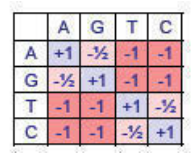

In [77]:
nucleotides = "AGCT"

nucleotide_indices = {nucleotide:i for i, nucleotide in enumerate(nucleotides)}

match_score = 1
transversion_score = -2
transition_score = -0.5

scoring_matrix = np.full([len(nucleotides), len(nucleotides)], transition_score)

chemical_class = {"A":"Purine", "T":"Pyrimidine", "C":"Pyrimidine","G":"Purine"}
for n1 in nucleotides:
    for n2 in nucleotides:
        n1_index = nucleotide_indices[n1]
        n2_index = nucleotide_indices[n2]
        if n1 == n2:
            scoring_matrix[n1_index][n2_index] = match_score
            continue

        n1_class = chemical_class[n1]
        n2_class = chemical_class[n2]

        if n1_class == n2_class:
            scoring_matrix[n1_index][n2_index] = transition_score
        else:
            scoring_matrix[n1_index][n2_index] = transversion_score
            
display(nice_table(scoring_matrix, row_labels=[n for n in nucleotides], col_labels=[n for n in nucleotides]))

,A,G,C,T
A,1.0,-0.5,-2.0,-2.0
G,-0.5,1.0,-2.0,-2.0
C,-2.0,-2.0,1.0,-0.5
T,-2.0,-2.0,-0.5,1.0


### Putting it All Together
Now we're going to integrate our scoring matrix with everything else with the `score_match` function

In [41]:
def score_match(n1, n2, scoring_matrix, scoring_matrix_indices={"A":0, "G":1, "C":2, "T":3}):
    # return score for substitution based on scoring matrix

    return scoring_matrix[scoring_matrix_indices[n1], scoring_matrix_indices[n2]]


In [42]:
AG_score = score_match("A","G", scoring_matrix, nucleotide_indices)
AT_score = score_match("A", "T", scoring_matrix, nucleotide_indices)

print(f"A-G score: {AG_score}")
print(f"A-T score: {AT_score}")

A-G score: -0.5
A-T score: -2.0


In [43]:
def needleman_wunsch(seqA, seqB, scoring_matrix, scoring_matrix_indices={"A":0, "G":0, "T":0, "C":0}, scoring_function=score_match, gap_penalty=-2):
    
    num_rows = len(seqA) + 1
    num_cols = len(seqB) + 1
    scoring_array = np.full([num_rows, num_cols], 0)
    traceback_array = np.full([num_rows, num_cols], "-")

    up_arrow = "⬆"
    down_arrow = "⬇"
    right_arrow = "➡"
    left_arrow = "⬅"
    right_down_arrow = "↘"
    left_up_arrow = "↖"
    
    arrow = "-"

    for row in range(num_rows):
        for col in range(num_cols):
            if row == 0 and col == 0:
                score = 0
            elif row == 0:
                previous_score = scoring_array[row, col - 1]
                score = gap_penalty + previous_score
            elif col == 0:
                previous_score = scoring_array[row - 1, col]
                score = gap_penalty + previous_score
            else:
                left_cell = scoring_array[row, col-1]
                diag_cell = scoring_array[row-1, col-1]
                up_cell = scoring_array[row-1, col]

                left_score = left_cell + gap_penalty
                up_score = up_cell + gap_penalty

                current_seqA = seqA[row-1]
                current_seqB = seqB[col-1]

                diag_score = diag_cell + score_match(current_seqA, current_seqB, scoring_matrix)
                score = max([left_score, up_score, diag_score])

                if score == left_score:
                    arrow = left_arrow
                elif score == up_score:
                    arrow = up_arrow
                elif score == diag_score:
                    arrow = left_up_arrow
                
            traceback_array[row, col] = arrow
            scoring_array[row, col] = score
    return scoring_array, traceback_array

In [44]:
scoring_array, traceback_array = needleman_wunsch(seqA, seqB, scoring_matrix)
display(nice_table(scoring_array, row_labels, column_labels))
display(nice_table(traceback_array, row_labels, column_labels))

,-,G,A,T,A,C,C,A
-,0,-2,-4,-6,-8,-10,-12,-14
G,-2,1,-1,-3,-5,-7,-9,-11
C,-4,-1,-1,-1,-3,-4,-6,-8
A,-6,-3,0,-2,0,-2,-4,-5
T,-8,-5,-2,1,-1,0,-2,-4
G,-10,-7,-4,-1,0,-2,-2,-2
C,-12,-9,-6,-3,-2,1,-1,-3
T,-14,-11,-8,-5,-4,-1,0,-2


,-,G,A,T,A,C,C,A
-,-,-,-,-,-,-,-,-
G,-,↖,⬅,⬅,⬅,⬅,⬅,⬅
C,⬅,⬆,↖,↖,⬅,↖,⬅,⬅
A,⬅,⬆,↖,⬅,↖,⬅,⬅,↖
T,↖,⬆,⬆,↖,⬅,↖,⬅,⬅
G,⬅,⬆,⬆,⬆,↖,⬅,↖,↖
C,↖,⬆,⬆,⬆,⬆,↖,⬅,⬅
T,⬅,⬆,⬆,⬆,⬆,⬆,↖,⬅


In [78]:
traceback_alignment(traceback_array, seqA, seqB)

('GCATGCT-', 'G-ATACCA')

### Random Sequence Generation
Before testing on real data, let's generate random strings of sequences and test out our alignment algorithm

In [62]:
np.random.seed(3947)

# Generating random sequences 
x = np.random.choice(['A', 'T', 'G', 'C'], 10)
y = np.random.choice(['A', 'T', 'G', 'C'], 13)
print(x, y)

scoring_array, traceback_array = needleman_wunsch(x, y, scoring_matrix)
print(scoring_array)
print(traceback_array)
traceback_alignment(traceback_array, x, y)

['T' 'A' 'G' 'G' 'C' 'A' 'T' 'C' 'A' 'C'] ['T' 'T' 'T' 'A' 'C' 'C' 'T' 'T' 'T' 'A' 'A' 'A' 'G']
[[  0  -2  -4  -6  -8 -10 -12 -14 -16 -18 -20 -22 -24 -26]
 [ -2   1  -1  -3  -5  -7  -9 -11 -13 -15 -17 -19 -21 -23]
 [ -4  -1  -1  -3  -2  -4  -6  -8 -10 -12 -14 -16 -18 -20]
 [ -6  -3  -3  -3  -3  -4  -6  -8 -10 -12 -12 -14 -16 -17]
 [ -8  -5  -5  -5  -3  -5  -6  -8 -10 -12 -12 -12 -14 -15]
 [-10  -7  -5  -5  -5  -2  -4  -6  -8 -10 -12 -14 -14 -16]
 [-12  -9  -7  -7  -4  -4  -4  -6  -8 -10  -9 -11 -13 -14]
 [-14 -11  -8  -6  -6  -4  -4  -3  -5  -7  -9 -11 -13 -15]
 [-16 -13 -10  -8  -8  -5  -3  -4  -3  -5  -7  -9 -11 -13]
 [-18 -15 -12 -10  -7  -7  -5  -5  -5  -5  -4  -6  -8 -10]
 [-20 -17 -14 -12  -9  -6  -6  -5  -5  -5  -6  -6  -8 -10]]
[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '↖' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅']
 ['⬅' '⬆' '↖' '⬅' '↖' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅' '⬅']
 ['⬅' '⬆' '⬆' '↖' '↖' '↖' '⬅' '⬅' '⬅' '⬅' '↖' '⬅' '⬅' '↖']
 ['↖' '⬆' '⬆' '⬆' 

('TAGGCATC-AC--', 'TTTACCTTTAAAG')

### Sequence Alignment for BRCA1 Mutation Sequence
Now that we've built the NW algorithm, let's test it out by comparing a mutated sequence in the BRCA1 gene
Since the sequnece is pretty long, we're not going to display it with the fancy table (Cause that's gonna take up too much space and potentially crash the notebook) so we're just going to print it out

In [52]:
f1 = open("BRCA1_part_mutated.txt")
seq1 = f1.readline()
f2 = open("BRCA1_part.txt")
seq2 = f2.readline()

row_labels = [label for label in "-"+seq1]
column_labels = [label for label in "-"+seq2]

scoring_array, traceback_array = needleman_wunsch(seq1, seq2, scoring_matrix)

print(scoring_array)
print(traceback_array)
traceback_alignment(traceback_array, seq1, seq2)


[[    0    -2    -4 ... -1116 -1118 -1120]
 [   -2     1    -1 ... -1113 -1115 -1117]
 [   -4    -1     2 ... -1110 -1112 -1114]
 ...
 [-1068 -1065 -1062 ...   336   334   332]
 [-1070 -1067 -1064 ...   339   337   335]
 [-1072 -1069 -1066 ...   342   340   338]]
[['-' '-' '-' ... '-' '-' '-']
 ['-' '↖' '⬅' ... '⬅' '⬅' '⬅']
 ['⬅' '⬆' '↖' ... '⬅' '⬅' '⬅']
 ...
 ['⬅' '⬆' '⬆' ... '⬅' '⬅' '⬅']
 ['⬅' '⬆' '⬆' ... '⬅' '⬅' '⬅']
 ['⬅' '⬆' '⬆' ... '↖' '⬅' '⬅']]


('TGAA--TT------CTA-TCT-T-A-----TTTCAGGTATACAATAAAGTATTTTAAACTATGTCCACATTAGAGTGCACCAGATCTGCAGAACATATTCGTCTTATATAACTGATGTTGGTCATGAGAATGTGCTAGTTCTCCTTTACCCCACCACCCAACGACTATCCCAGTCAGCGGCTTTTCTCTCTTTCTGGAATCTTCAGAGCATTCCAGATATACAGTCTCAAAAAATC-TATAAAATCCCTTTTAAGGAATAACTTAAGTTCATTTTGCCTTGCCAATATGTATTCAGGAGAAGAAGGAAGCCATATAAGAATGGAAATGTTATCTGCAAATGTTACCTGCAATGGGGGCGATAGCTAGATACAGGAGATTACTCCTCCATTGTTGAGTCAACTTAAGTGCATGTCTTGCGAATGTAGAGTCCCAATGTAATT-----------GAG--TTAAAT----G--CTCTTTC-CA-A--GAGAAGACCCAACCTTAAATCTGAGTCTGCATAAATCTATTTTAGCTAAATAACATCACACATTAAAATTTTCCTCAGCTGGAA--TA-A--TAA-AA--',
 'TGAACATTTAAGATCCACTTTCTCAGCAAATTTCAGGTATACAATAAAGTATTTTAAACTATGTCCACATTAGAGTGCACCAGATCTGCAGAACATATTCGTCTTATATAACTGATGTTGGTCATGAGAATGTGCTAGTTCTCCTTTACCCCACCACCCAACGACTATCCCAGTCAGCGGCTTTTCTCTCTTTCTGGAATCTTCAGAGCATTCCAGATATACAGTCTCAAAAGATGGCATCT-GTATTTTTTAAGGAATAACTTAAGTTCATTTTGCCTTGCCAATATGTATTCAGGAGAAGAAGGAAGCCATATAAGAATGGAAATGTTATCTGCAAATGTTACCTGCAA--------ATA-C-AG-----G-AGATTACTCCTCCATTGTTGAGTCAACTTAAGTGC